<a href="https://colab.research.google.com/github/javierarteagapuell/deeplearning/blob/main/Copia_de_Copia_de_Prac2Ej1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funcionamiento de las LIBRERIAS mlxtend o apyori

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

from mlxtend.frequent_patterns import apriori, association_rules

#pip install mlxtend  

In [ ]:
data = pd.read_csv('BlackFriday.csv', encoding='UTF-8')
data.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

Vamos a ver las ocurrencias de datos en las columnas de nuestro dataframe. Obviaremos product ID y user ID ya que los dos son unicos o hay muchos registros distintos de cada valor.


In [ ]:
cols_interes= data.columns[2:]
for col in cols_interes:
    print(f'Valores de la columa {col}: {data[col].unique()}')

Valores de la columa Gender: ['M' 'F']
Valores de la columa Age: ['46-50' '26-35' '36-45' '18-25' '51-55' '55+' '0-17']
Valores de la columa Occupation: [ 7 17  1 15  3  0  8 16  4 12 13 18 11  9  2 20 14 10  6 19  5]
Valores de la columa City_Category: ['B' 'C' 'A']
Valores de la columa Stay_In_Current_City_Years: ['2' '0' '4+' '1' '3']
Valores de la columa Marital_Status: [1 0]
Valores de la columa Product_Category_1: [ 1  3  5  4  2 10 15 18  8 13  6 11 12  7 16 14 17  9]
Valores de la columa Product_Category_2: [11.  5. 14.  9.  3.  4. 13.  2. nan  8. 15. 17. 12. 16.  6. 10. 18.  7.]
Valores de la columa Product_Category_3: [nan 12. 15.  9. 16. 14.  4.  3.  5.  8. 17. 13. 11. 10.  6. 18.]


Vemos que las columas de Gender y Maritial Status son binarias. Las demas de pueden pasar a categoricas usando la fucnion .get_dummies. Esto lo haremos mas alanete ya que primero hay que comprobar si hay valores repetidos o nulos.

In [ ]:
data.isnull().values.any() 

True

Vemos en que columnas hay NA's

In [ ]:
data.isna().sum()  

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

Los valores de NaN aparecen en Product Category. Vamos a comprobar el rango de valores para estas dos categorias.

In [ ]:
print(data['Product_Category_1'].min(), data['Product_Category_1'].max(), data['Product_Category_1'].mean())

1 18 5.276542279718663


In [ ]:
print(data['Product_Category_2'].min(), data['Product_Category_2'].max(), data['Product_Category_2'].mean())


2.0 18.0 9.849586059346997


In [ ]:
print(data['Product_Category_3'].min(), data['Product_Category_3'].max(), data['Product_Category_3'].mean())

3.0 18.0 12.669453946534905


Observamos que las dos columnas tienen valores minimos de 2 y 3 respectivamente. Por tanto los valores NaN se pueden igualar a 0 para que asi se contemplen en el analisis de los datos pero no influyan al estudio. 

In [ ]:
data.fillna(0, inplace=True)

Vemos si hay algún dato duplicado

In [ ]:
if any(data.duplicated()):
  print("Hay datos duplicados")
else:
  print("No hay datos duplicados")

No hay datos duplicados


- Prueba al menos tres configuraciones de soporte y frecuencia para cada género, edad y tipo de producto.

In [ ]:
# Variables categoricas a dummy 
dummy_df = pd.get_dummies(data,columns=['Product_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3'])

# Concatenamos las variables dummy con el DataFrame original
data4 = pd.concat([data, dummy_df], axis=1)

# Drop las columnas originales. Ademas Drop de User_ID ya que es unico para cada cliente
data4.drop(['User_ID','Product_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3'], axis=1, inplace=True)

data4



,Product_ID_P00000142,Product_ID_P00000242,Product_ID_P00000342,Product_ID_P00000442,Product_ID_P00000542,Product_ID_P00000642,Product_ID_P00000742,Product_ID_P00000842,Product_ID_P00000942,Product_ID_P00001042,...,Product_Category_3_9.0,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
233595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
233596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
233597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(data4.columns)

Index(['Product_ID_P00000142', 'Product_ID_P00000242', 'Product_ID_P00000342',
       'Product_ID_P00000442', 'Product_ID_P00000542', 'Product_ID_P00000642',
       'Product_ID_P00000742', 'Product_ID_P00000842', 'Product_ID_P00000942',
       'Product_ID_P00001042',
       ...
       'Product_Category_3_9.0', 'Product_Category_3_10.0',
       'Product_Category_3_11.0', 'Product_Category_3_12.0',
       'Product_Category_3_13.0', 'Product_Category_3_14.0',
       'Product_Category_3_15.0', 'Product_Category_3_16.0',
       'Product_Category_3_17.0', 'Product_Category_3_18.0'],
      dtype='object', length=3583)


Colocamos los datos de la forma indicada para poder calcular las frecuencias de estos más adelante

# 1) Itemsets frecuentes para k=1

Para hallar esto necesitamos calcular el soporte y las frecuencias de estos itemsets

IR VARIANDO EL MIN_SUPPORT HASTA QUE SALE UN NÚMERO DE REGLAS RAZONABLE

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(data4, min_support=0.2, use_colnames=True)
frequent_itemsets_k1 =frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 1)]
frequent_itemsets_k1_sort = frequent_itemsets_k1.sort_values(by=['support'], ascending=False)

frequent=frequent_itemsets_k1_sort.support*len(data4)
frequent_itemsets_k1_sort['frecuencia'] =frequent
frequent_itemsets_k1_sort

,support,itemsets,frecuencia
1,0.752452,(Gender_M),175772.0
13,0.695902,(Product_Category_3_0.0),162562.0
7,0.589930,(Marital_Status_0),137807.0
4,0.421945,(City_Category_B),98566.0
8,0.410070,(Marital_Status_1),95792.0
2,0.399950,(Age_26-35),93428.0
6,0.353615,(Stay_In_Current_City_Years_1),82604.0
5,0.310399,(City_Category_C),72509.0
12,0.309693,(Product_Category_2_0.0),72344.0
10,0.278327,(Product_Category_1_5),65017.0


COMPRUEBAMOS QUE LOS VALORES SON LOS CORRESTOS

SupportMale=len(Gender)/Male



In [ ]:
SupportMale=sum(data4.Gender_M==True)/len(data4.Gender_M+data4.Gender_F)
print(SupportMale)

0.7524518512493632


Vamos que es correcto

# 2) Itemsets frecuentes para k≥2.

## a. Mostrar los itemset frecuentes candidatos y su soporte.

In [ ]:
frequent_itemsets_k2 =frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 2)]
frequent_itemsets_k2_sort = frequent_itemsets_k2.sort_values(by=['support'], ascending=False)
frequent=frequent_itemsets_k2_sort.support*len(data4)
frequent_itemsets_k2_sort['frecuenciak2'] =frequent
frequent_itemsets_k2_sort

,support,itemsets,frecuenciak2
24,0.516963,"(Gender_M, Product_Category_3_0.0)",120762.0
19,0.445888,"(Gender_M, Marital_Status_0)",104159.0
32,0.408080,"(Product_Category_3_0.0, Marital_Status_0)",95327.0
16,0.316722,"(City_Category_B, Gender_M)",73986.0
35,0.309693,"(Product_Category_3_0.0, Product_Category_2_0.0)",72344.0
14,0.307150,"(Age_26-35, Gender_M)",71750.0
20,0.306564,"(Marital_Status_1, Gender_M)",71613.0
28,0.296166,"(City_Category_B, Product_Category_3_0.0)",69184.0
33,0.287822,"(Marital_Status_1, Product_Category_3_0.0)",67235.0
26,0.278636,"(Age_26-35, Product_Category_3_0.0)",65089.0


# 3) Repetir el proceso 2 hasta que no se generen nuevos itemsets frecuentes.

In [ ]:
frequent_itemsets_k3 = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 3)]
frequent_itemsets_k3_sort = frequent_itemsets_k3.sort_values(by=['support'], ascending=False)

frequent=frequent_itemsets_k3_sort.support*len(data4)
frequent_itemsets_k3_sort['frecuenciak3'] =frequent

frequent_itemsets_k3_sort

,support,itemsets,frecuenciak3
38,0.304248,"(Gender_M, Product_Category_3_0.0, Marital_Sta...",71072.0
40,0.230343,"(Gender_M, Product_Category_3_0.0, Product_Cat...",53808.0
37,0.219389,"(City_Category_B, Gender_M, Product_Category_3...",51249.0
39,0.212715,"(Marital_Status_1, Product_Category_3_0.0, Gen...",49690.0
36,0.210527,"(Age_26-35, Gender_M, Product_Category_3_0.0)",49179.0


In [ ]:
frequent_itemsets_k4 = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 4)]
frequent_itemsets_k4_sort = frequent_itemsets_k4.sort_values(by=['support'], ascending=False)

frequent=frequent_itemsets_k4_sort.support*len(data4)
frequent_itemsets_k4_sort['frecuenciak3'] =frequent

frequent_itemsets_k4_sort.head()

,support,itemsets,frecuenciak3


Observamos que para K=4 no hay mas itemsets que cumplan el requisito de tener un soporte minimo del 20%. 

# 4) Mostrar todas las posibles reglas con la confianza de cada una de ellas.

In [ ]:
rules = association_rules(frequent_itemsets, metric='confidence',  min_threshold=0.85)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Product_Category_1_5),(Product_Category_3_0.0),0.278327,0.695902,0.243879,0.876232,1.259132,0.050191,2.457008
1,(Product_Category_2_0.0),(Product_Category_3_0.0),0.309693,0.695902,0.309693,1.000000,1.436984,0.094177,inf
2,"(Gender_M, Product_Category_2_0.0)",(Product_Category_3_0.0),0.230343,0.695902,0.230343,1.000000,1.436984,0.070047,inf


# 5) Listar todas las reglas que sean de alta confianza.

1- SEGÚN SU CONFIANZA

In [ ]:
rules_sort = rules.sort_values(by=['confidence'], ascending=False)
rules_sort

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,"(Gender_M, Product_Category_2_0.0)",(Product_Category_3_0.0),0.230343,0.695902,0.230343,1.000000,1.436984,0.070047,inf
20,(Product_Category_2_0.0),(Product_Category_3_0.0),0.309693,0.695902,0.309693,1.000000,1.436984,0.094177,inf
19,(Product_Category_1_5),(Product_Category_3_0.0),0.278327,0.695902,0.243879,0.876232,1.259132,0.050191,2.457008
7,(Product_Category_1_1),(Gender_M),0.258225,0.752452,0.212480,0.822848,1.093555,0.018178,1.397375
0,(Age_26-35),(Gender_M),0.399950,0.752452,0.307150,0.767971,1.020625,0.006207,1.066885
5,(Marital_Status_0),(Gender_M),0.589930,0.752452,0.445888,0.755832,1.004493,0.001994,1.013845
22,"(Age_26-35, Product_Category_3_0.0)",(Gender_M),0.278636,0.752452,0.210527,0.755565,1.004138,0.000868,1.012738
1,(City_Category_A),(Gender_M),0.267655,0.752452,0.202090,0.755038,1.003437,0.000692,1.010558
3,(City_Category_C),(Gender_M),0.310399,0.752452,0.233640,0.752707,1.000339,0.000079,1.001030
2,(City_Category_B),(Gender_M),0.421945,0.752452,0.316722,0.750624,0.997571,-0.000771,0.992670


# 6) Dado un antecesor, devolver todas las reglas que contengan a dicho antecesor. 


In [ ]:
antereg=rules_sort[rules_sort['antecedents'].apply(lambda x: 'Age_26-35' in x)]
antereg

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
22,(Age_26-35),(Marital_Status_0),0.399950,0.589930,0.241885,0.604787,1.025184,0.005942,1.037592
0,(Age_26-35),(Gender_M),0.399950,0.752452,0.307150,0.767971,1.020625,0.006207,1.066885
47,(Age_26-35),"(Gender_M, Product_Category_3_0.0)",0.399950,0.516963,0.210527,0.526384,1.018224,0.003768,1.019892
45,"(Age_26-35, Product_Category_3_0.0)",(Gender_M),0.278636,0.752452,0.210527,0.755565,1.004138,0.000868,1.012738
24,(Age_26-35),(Product_Category_3_0.0),0.399950,0.695902,0.278636,0.696676,1.001112,0.000309,1.002550
44,"(Age_26-35, Gender_M)",(Product_Category_3_0.0),0.307150,0.695902,0.210527,0.685422,0.984940,-0.003219,0.966684


## 6.2) Dado un umbral mínimo devolver todas las reglas que cumplan con dicha confianza.

In [ ]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Age_26-35),(Gender_M),0.399950,0.752452,0.307150,0.767971,1.020625,0.006207,1.066885
1,(City_Category_A),(Gender_M),0.267655,0.752452,0.202090,0.755038,1.003437,0.000692,1.010558
2,(City_Category_B),(Gender_M),0.421945,0.752452,0.316722,0.750624,0.997571,-0.000771,0.992670
3,(City_Category_C),(Gender_M),0.310399,0.752452,0.233640,0.752707,1.000339,0.000079,1.001030
4,(Stay_In_Current_City_Years_1),(Gender_M),0.353615,0.752452,0.259642,0.734250,0.975810,-0.006436,0.931508
5,(Marital_Status_0),(Gender_M),0.589930,0.752452,0.445888,0.755832,1.004493,0.001994,1.013845
6,(Marital_Status_1),(Gender_M),0.410070,0.752452,0.306564,0.747589,0.993537,-0.001994,0.980733
7,(Product_Category_1_1),(Gender_M),0.258225,0.752452,0.212480,0.822848,1.093555,0.018178,1.397375
8,(Product_Category_1_5),(Gender_M),0.278327,0.752452,0.200707,0.721119,0.958359,-0.008721,0.887648
9,(Product_Category_2_0.0),(Gender_M),0.309693,0.752452,0.230343,0.743780,0.988475,-0.002686,0.966154


# 7) Representar gráficamente las reglas obtenidas


Es interesante analizar las siguientes graficas:

Soporte vs. Cantidad de elementos: Con esta grafica podemos representar el soporte de cada conjunto de elementos de diferentes tamaños. Puede ayudar a identificar los conjuntos de elementos más frecuentes y sus tamaños.

Confianza vs. soporte: Este gráfico muestra la confianza de las reglas de asociación frente a su soporte. Puede ayudar a identificar las reglas que son de alta calidad y tienen un alto soporte.

Lift vs. soporte: Este puede ayudar a identificar las reglas que tienen mayor impacto significativo en la venta de los elementos.


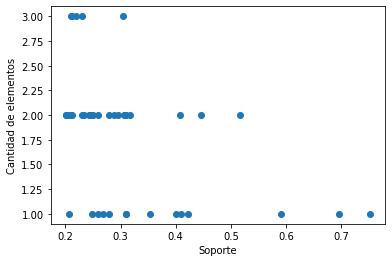

In [ ]:
plt.scatter(frequent_itemsets.support, frequent_itemsets.itemsets.apply(lambda x: len(x)))
plt.xlabel('Soporte')
plt.ylabel('Cantidad de elementos')
plt.show()


Con esta grafica de Soporte vs Cantidad de elementos vemos la cantidad de reglas para cada uno de los k de los itemsets y sus respectivos valores de soporte. Se ve que el mejor soporte lo da los k=1.

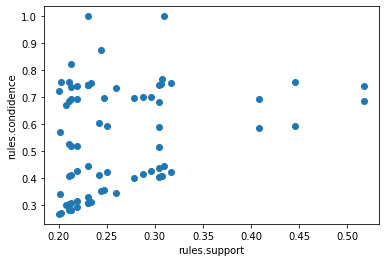

In [ ]:
plt.xlabel('rules.support')
plt.ylabel('rules.confidence')
plt.scatter(rules.support, rules.confidence)  

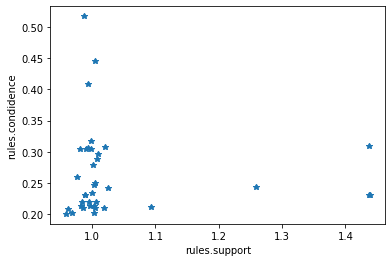

In [ ]:
plt.xlabel('rules.support')
plt.ylabel('rules.lift')
plt.plot(rules['lift'],rules['support'], '*')  
plt.plot(rules.lift,rules.support,'*')

## 7.1) Obtener conclusiones a partir de estas

- Prueba al menos tres configuraciones de soporte y frecuencia para cada género, edad y tipo de producto.

In [ ]:
# lista de variables dummy 
dummy_vars = list(data4.columns)
#Filtramos para genero, edad y tipo de producto
age_vars = [var for var in dummy_vars if var.startswith('Age')]
age_data = data4[age_vars]
gender_vars = [var for var in dummy_vars if var.startswith('Gender')]
gender_data = data4[gender_vars]
pc1_vars = [var for var in dummy_vars if var.startswith('Product_Category_1')]
pc1_data = data4[pc1_vars]
pc2_vars = [var for var in dummy_vars if var.startswith('Product_Category_2')]
pc2_data = data4[pc2_vars]
pc3_vars = [var for var in dummy_vars if var.startswith('Product_Category_3')]
pc3_data = data4[pc3_vars]

In [ ]:
dataq1 = pd.concat([age_data, gender_data, pc1_data, pc2_data, pc3_data], axis = 1)
frq_items_q1 = apriori(dataq1, min_support = 0.3, use_colnames = True)


In [ ]:
frq_items_q1_25 = frq_items_q1[frq_items_q1["support"].apply(lambda x: 0.25 <= x)]
frq_items_q1_50 = frq_items_q1[frq_items_q1["support"].apply(lambda x: 0.50 <= x)]
frq_items_q1_75 = frq_items_q1[frq_items_q1["support"].apply(lambda x: 0.75 <= x)]

In [ ]:
frq_items_q1_25

,support,itemsets
0,0.399950,(Age_26-35)
1,0.752452,(Gender_M)
2,0.309693,(Product_Category_2_0.0)
3,0.695902,(Product_Category_3_0.0)
4,0.307150,"(Age_26-35, Gender_M)"
5,0.516963,"(Gender_M, Product_Category_3_0.0)"
6,0.309693,"(Product_Category_3_0.0, Product_Category_2_0.0)"


In [ ]:
frq_items_q1_50

,support,itemsets
1,0.752452,(Gender_M)
3,0.695902,(Product_Category_3_0.0)
5,0.516963,"(Gender_M, Product_Category_3_0.0)"


In [ ]:
frq_items_q1_75

,support,itemsets
1,0.752452,(Gender_M)


¿Qué tipo reglas desaparecen según la configuración y categorías (género, edad y tipo de producto)
consideradas? ¿Por qué?

In [ ]:
rules_25 = association_rules(frq_items_q1_25, metric = 'confidence', min_threshold=0.51)
rules_25

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Age_26-35),(Gender_M),0.399950,0.752452,0.307150,0.767971,1.020625,0.006207,1.066885
1,(Gender_M),(Product_Category_3_0.0),0.752452,0.695902,0.516963,0.687038,0.987262,-0.006670,0.971676
2,(Product_Category_3_0.0),(Gender_M),0.695902,0.752452,0.516963,0.742867,0.987262,-0.006670,0.962725
3,(Product_Category_2_0.0),(Product_Category_3_0.0),0.309693,0.695902,0.309693,1.000000,1.436984,0.094177,inf


In [ ]:
rules_50 = association_rules(frq_items_q1_50, metric = 'confidence', min_threshold=0.51)
rules_50

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gender_M),(Product_Category_3_0.0),0.752452,0.695902,0.516963,0.687038,0.987262,-0.00667,0.971676
1,(Product_Category_3_0.0),(Gender_M),0.695902,0.752452,0.516963,0.742867,0.987262,-0.00667,0.962725


In [ ]:
rules_75 = association_rules(frq_items_q1_75, metric = 'confidence', min_threshold=0.51)
rules_75

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


Para una de las configuraciones, interpreta algunas de las reglas que te hayan resultado interesantes
obtenidas usando la clase association_rules y un par de configuraciones cambiando la variable metric y
min_threshold. Justifica los resultados

In [ ]:
rules_25_lift = association_rules(frq_items_q1_25, metric = 'lift', min_threshold=0.51)
rules_25_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Age_26-35),(Gender_M),0.399950,0.752452,0.307150,0.767971,1.020625,0.006207,1.066885
1,(Gender_M),(Age_26-35),0.752452,0.399950,0.307150,0.408199,1.020625,0.006207,1.013939
2,(Gender_M),(Product_Category_3_0.0),0.752452,0.695902,0.516963,0.687038,0.987262,-0.006670,0.971676
3,(Product_Category_3_0.0),(Gender_M),0.695902,0.752452,0.516963,0.742867,0.987262,-0.006670,0.962725
4,(Product_Category_3_0.0),(Product_Category_2_0.0),0.695902,0.309693,0.309693,0.445024,1.436984,0.094177,1.243850
5,(Product_Category_2_0.0),(Product_Category_3_0.0),0.309693,0.695902,0.309693,1.000000,1.436984,0.094177,inf


In [ ]:
rules_25_conviction = association_rules(frq_items_q1_25, metric = 'conviction', min_threshold=0.51)
rules_25_conviction

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Age_26-35),(Gender_M),0.399950,0.752452,0.307150,0.767971,1.020625,0.006207,1.066885
1,(Gender_M),(Age_26-35),0.752452,0.399950,0.307150,0.408199,1.020625,0.006207,1.013939
2,(Gender_M),(Product_Category_3_0.0),0.752452,0.695902,0.516963,0.687038,0.987262,-0.006670,0.971676
3,(Product_Category_3_0.0),(Gender_M),0.695902,0.752452,0.516963,0.742867,0.987262,-0.006670,0.962725
4,(Product_Category_3_0.0),(Product_Category_2_0.0),0.695902,0.309693,0.309693,0.445024,1.436984,0.094177,1.243850
5,(Product_Category_2_0.0),(Product_Category_3_0.0),0.309693,0.695902,0.309693,1.000000,1.436984,0.094177,inf


In [ ]:
rules_maximales = rules [max(rules)]
rules_maximales.head()

2- SEGÚN SU LIFT

In [ ]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.8)
rules_sort = rules.sort_values(by=['lift'], ascending=False)
rules_sort.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
68,"(Gender_M, Product_Category_3_0.0)",(Product_Category_2_0.0),0.516963,0.309693,0.230343,0.445571,1.438749,0.070244,1.245076
73,(Product_Category_2_0.0),"(Gender_M, Product_Category_3_0.0)",0.309693,0.516963,0.230343,0.743780,1.438749,0.070244,1.885242
72,(Product_Category_3_0.0),"(Gender_M, Product_Category_2_0.0)",0.695902,0.230343,0.230343,0.331000,1.436984,0.070047,1.150458
42,(Product_Category_3_0.0),(Product_Category_2_0.0),0.695902,0.309693,0.309693,0.445024,1.436984,0.094177,1.243850
69,"(Gender_M, Product_Category_2_0.0)",(Product_Category_3_0.0),0.230343,0.695902,0.230343,1.000000,1.436984,0.070047,inf


In [ ]:
rules_maximales = rules [max(rules)]
rules_maximales.head()

0    0.307150
1    0.307150
2    0.202090
3    0.202090
4    0.316722
Name: support, dtype: float64

-   Para   una   de   las   configuraciones,   interpreta   algunas   de   las   reglas
  que   
  te   hayan   resultado   interesantes
obtenidas   usando   la   clase  association_rules  y   
un   par   de   configuraciones   cambiando   la   variable  metric  y
min_threshold.  
Justifica los resultados. (1 punto)

In [ ]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.4)
rules_sort = rules.sort_values(by=['lift'], ascending=False)
rules_sort.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
68,"(Gender_M, Product_Category_3_0.0)",(Product_Category_2_0.0),0.516963,0.309693,0.230343,0.445571,1.438749,0.070244,1.245076
73,(Product_Category_2_0.0),"(Gender_M, Product_Category_3_0.0)",0.309693,0.516963,0.230343,0.743780,1.438749,0.070244,1.885242
72,(Product_Category_3_0.0),"(Gender_M, Product_Category_2_0.0)",0.695902,0.230343,0.230343,0.331000,1.436984,0.070047,1.150458
42,(Product_Category_3_0.0),(Product_Category_2_0.0),0.695902,0.309693,0.309693,0.445024,1.436984,0.094177,1.243850
69,"(Gender_M, Product_Category_2_0.0)",(Product_Category_3_0.0),0.230343,0.695902,0.230343,1.000000,1.436984,0.070047,inf


- Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar  de
alguna manera como se comportan los clientes? Expón las conclusiones respaldadas con datos (1 punto)

In [ ]:
any(rules.duplicated())

False

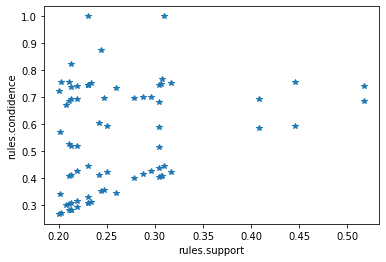

In [ ]:
plt.xlabel('rules.support')
plt.ylabel('rules.condidence')
plt.plot(rules.support, rules.confidence, '*')  

#Se Pide:

A partir de lo anterior se pide:

- Prueba al menos tres configuraciones de soporte y frecuencia para cada género, edad y tipo de producto.
(1 punto)

- ¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos

-   ¿Qué   tipo   reglas   desaparecen   según   la   configuración   y   categorías   ( género,   edad   y   tipo   de   producto)
consideradas? ¿Por qué? (1 punto)

2 TIPOS DE CLASIFICAR REGLAS SEGÚN SU CONFIGURACIÓN:

1- SEGÚN SU CONFIANZA

CONFIZANZA= SOPORTE(1) / SOPORTE(1,2)

2- SEGÚN SU LIFT

LIFT = CONFIANZA / SOPORTE

3 TIPOS DE CLASIFICAR REGLAS SEGÚN SU CATEGORÍA:

1- GÉNERO 2- EDAD 3- TIPO DE PRODUCTO

-   Para   una   de   las   configuraciones,   interpreta   algunas   de   las   reglas   que   te   hayan   resultado   interesantes
obtenidas   usando   la   clase  association_rules  y   un   par   de   configuraciones   cambiando   la   variable  metric  y
min_threshold. Justifica los resultados. (1 punto)

- Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar  de
alguna manera como se comportan los clientes? Expón las conclusiones respaldadas con datos (1 punto)